<a href="https://colab.research.google.com/github/cauancalmeida/Data_Science_studies/blob/main/An%C3%A1lise_Descritiva_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes_sm=[0,1576,3152,7880,15760,200000]

### 2º Definir os labels das classes

In [5]:
labels_sm=['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [6]:
freq_renda= pd.value_counts(pd.cut(x= dados.Renda, bins= classes_sm, labels=labels_sm, include_lowest= True))
freq_renda

Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
freq_renda_percent= pd.value_counts(pd.cut(x= dados.Renda, bins= classes_sm, labels=labels_sm, include_lowest= True), normalize= True) *100
freq_renda_percent

Renda
E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
distri_freq_renda = pd.DataFrame({'Frequencia': freq_renda, 'Frequencia (%)': freq_renda_percent}).sort_index(ascending= False)
distri_freq_renda

,Frequencia,Frequencia (%)
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

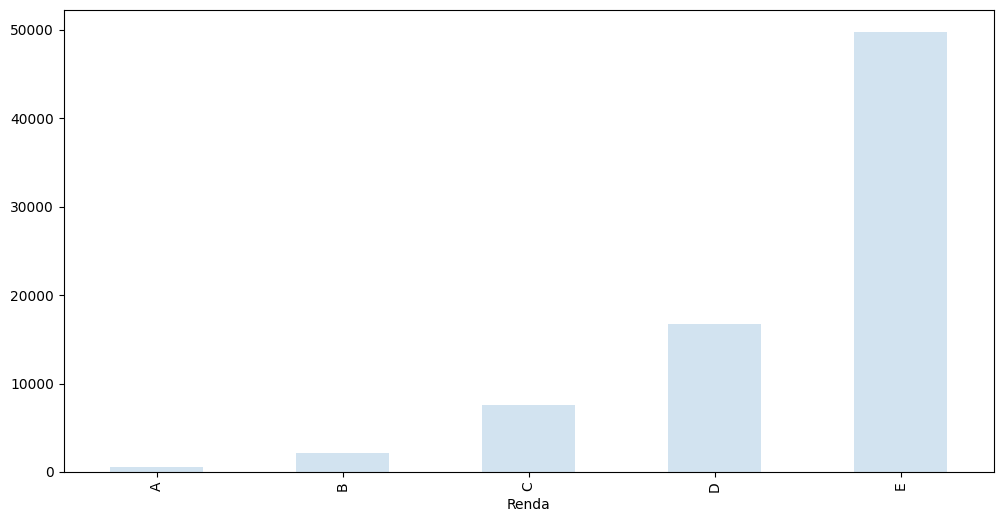

In [9]:
distri_freq_renda['Frequencia'].plot.bar(width=0.5, alpha= 0.2, figsize=(12,6))

> ### Conclusões

A minoria da população esta na classe A. Enquanto a maior parte esta na classe E. Ou seja, muitos tem pouco enquanto poucos tem muito. Mostrando a desigualdade tremenda na sociedade brasileira.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

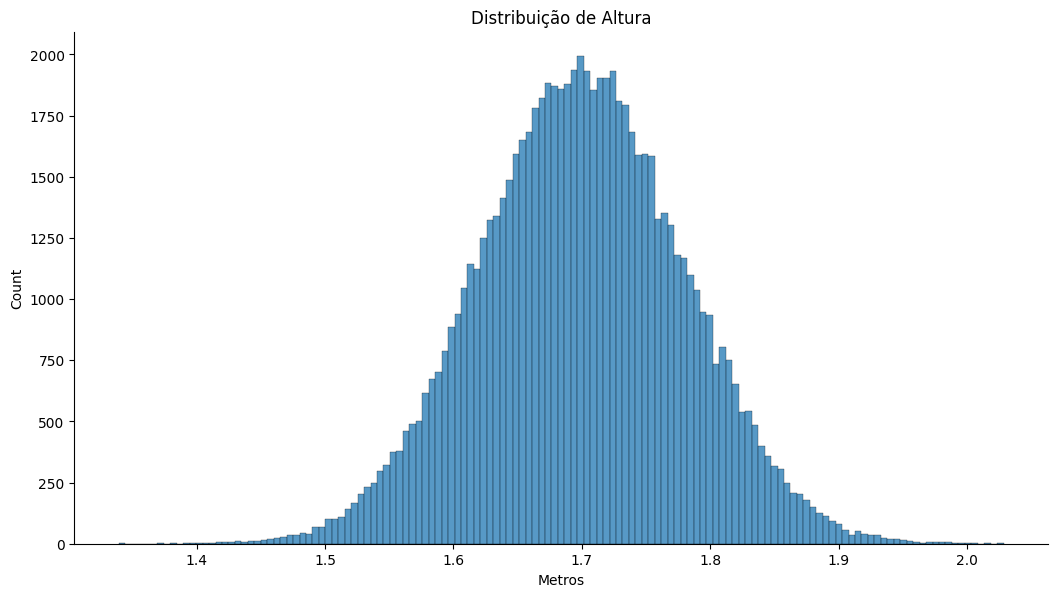

In [10]:
hist_altura = sns.displot(dados.Altura, kde = False)
hist_altura.figure.set_size_inches(12,6)
hist_altura.set(title='Distribuição de Altura')
hist_altura.set(xlabel= 'Metros')

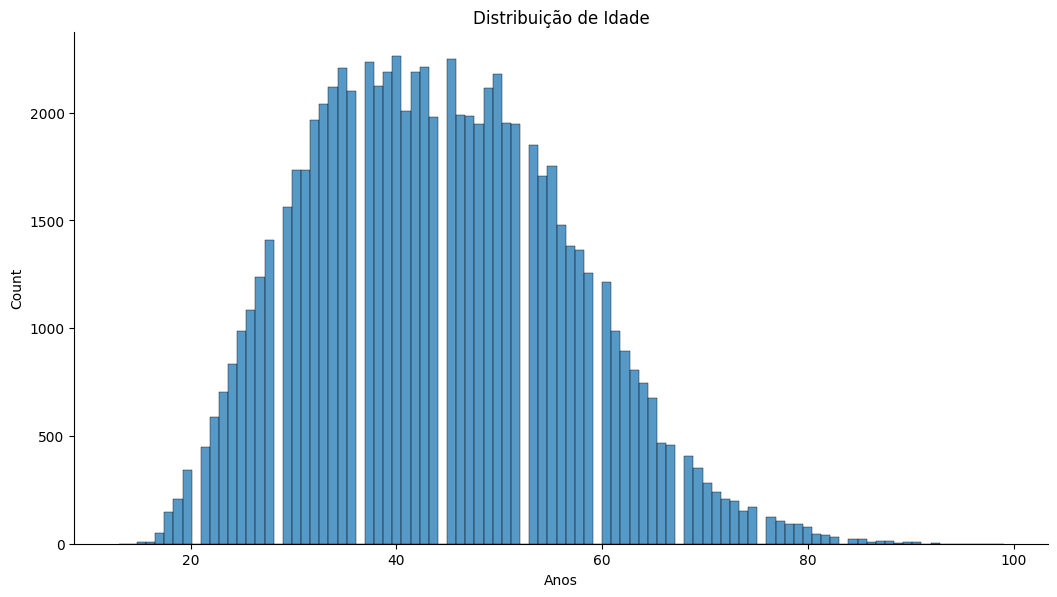

In [11]:
hist_idade = sns.displot(dados.Idade, kde = False)
hist_idade.figure.set_size_inches(12,6)
hist_idade.set(title='Distribuição de Idade')
hist_idade.set(xlabel= 'Anos')

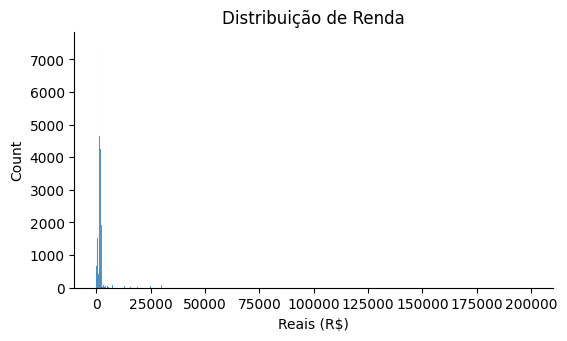

In [12]:
hist_renda = sns.displot(dados.Renda, kde = False)
hist_renda.figure.set_size_inches(6,3)
hist_renda.set(title='Distribuição de Renda')
hist_renda.set(xlabel= 'Reais (R$)')

> ### Conclusões

A maior parte da população brasileira em 2015 tem altura entre 1,60m e 1,80m e tem idade entre 20 e 60 anos. A maior parte dos brasileiros também tem renda menor ou igual a 2500 reais.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

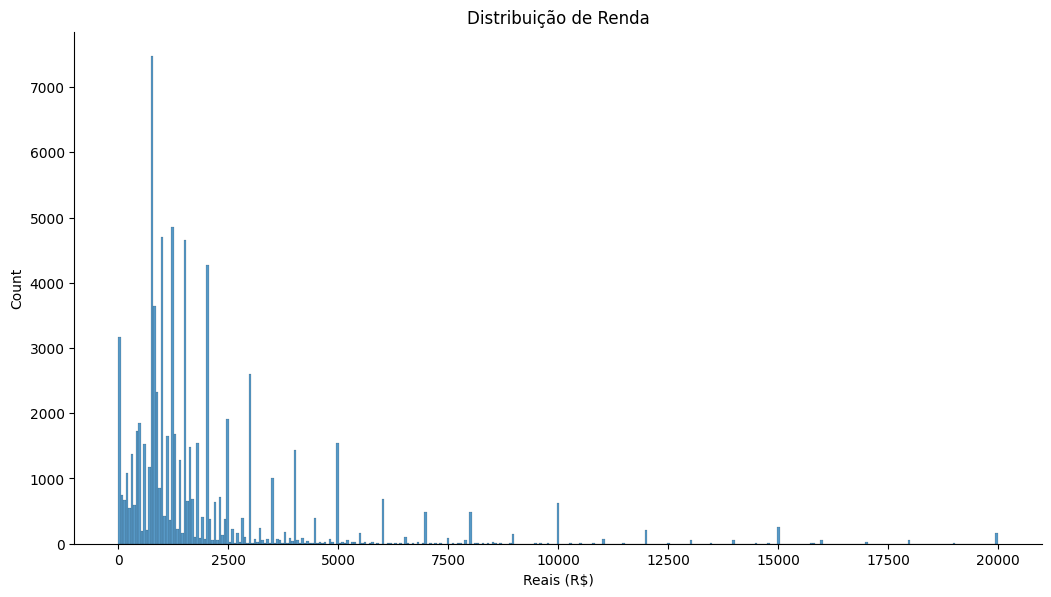

In [13]:
hist_renda = sns.displot(dados.query('Renda <= 20000').Renda, kde = False)
hist_renda.figure.set_size_inches(12,6)
hist_renda.set(title='Distribuição de Renda')
hist_renda.set(xlabel= 'Reais (R$)')

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [15]:
freq_sex_cor=pd.crosstab(dados.Sexo, dados.Cor)
freq_sex_cor.rename(index = sexo, inplace= True)
freq_sex_cor.rename(columns= cor, inplace= True)
freq_sex_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [16]:
freq_sex_cor_percent=pd.crosstab(dados.Sexo, dados.Cor, normalize=True)*100
freq_sex_cor_percent.rename(index = sexo, inplace= True)
freq_sex_cor_percent.rename(columns= cor, inplace= True)
freq_sex_cor_percent

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

A maior parte da população brasileira em 2015 é maculina e parda. E a minoria são mulher indígenas.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [18]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [19]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [20]:
desv_abs_media= abs(dados.Renda - dados.Renda.mean()).mean()
desv_abs_media

1526.4951371638058

### Obtenha a variância

In [21]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [22]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [23]:
renda_sex_cor=pd.crosstab(dados.Sexo, dados.Cor, dados.Renda, aggfunc = ['mean','median', 'max'])
renda_sex_cor.rename(index = sexo, inplace= True)
renda_sex_cor.rename(columns= cor, inplace= True)
renda_sex_cor

mean                                                      \
Cor           Indígena       Branca        Preta      Amarela        Parda   
Sexo                                                                         
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425   
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516   

            median                                      max                 \
Cor       Indígena  Branca   Preta Amarela   Parda Indígena  Branca  Preta   
Sexo                                                                         
Masculino    797.5  1700.0  1200.0  2800.0  1200.0    10000  200000  50000   
Feminino     788.0  1200.0   800.0  1500.0   800.0   120000  100000  23000   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino   50000  100000  
Feminino    20000   30000

> ### Conclusões

Temos uma discrepancia de Renda pela cor, quando adicionamos o fator sexo pioram.
Basta observar o salario medio de um Homem asiatico (de cor "Amarela") com o salario de uma mulher preta.
Também podemos deduzier uma disperção grande dos dados ao comparar o a Renda maxima com a mediana, para todos os casos.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [24]:
disp_renda_sex_cor=pd.crosstab(dados.Sexo, dados.Cor, dados.Renda, aggfunc = ['var', 'std'])
disp_renda_sex_cor.rename(index = sexo, inplace= True)
disp_renda_sex_cor.rename(columns= cor, inplace= True)
disp_renda_sex_cor

var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                                  std                                        \
Cor               Parda      Indígena       Branca        Preta     Amarela   
Sexo                                                                          
Masculino  5.345747e+06   1204.093490  4750.791872  1936.309271  5740.82482   
Feminino   2.547960e+06  11957.498292  3251.013154  1349.799809  3731.17366   

                        
Cor              Parda  
Sexo                    
Masculino  2312.087184  
Feminino   1596.233048

> ### Conclusões

Vemos uma disperção muito grande para mulheres indígenas, ou seja, provavelmente algumas mulheres ganham mais que a maioria está puxando a media para cima.

Temos também a comprovação da disperção dos dados deduzido anteriormente.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Renda', ylabel='Cor'>

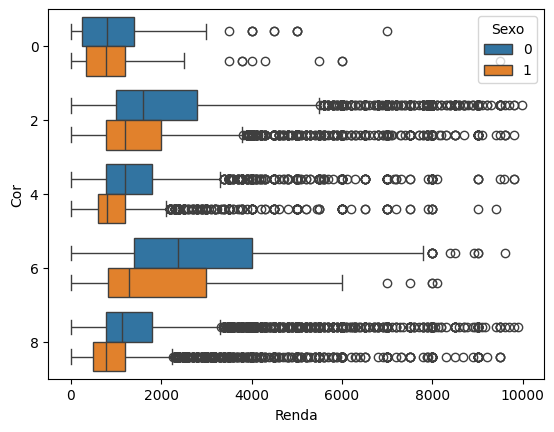

In [40]:
sns.boxplot(x= 'Renda', y= 'Cor', data=dados.query('Renda < 10000'), hue='Sexo', orient='h')

> ### Conclusões

Fica muito claro uma maior diferença entre homens e mulheres em todas as cores. Em alguns casos, a mediana masculina tem um valor muito proximo ao Q3 de mulheres

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [37]:
from scipy import stats
stats.percentileofscore(dados.Renda,788, kind='weak')


28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [38]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [39]:
renda_ano_estudo_sex=pd.crosstab(dados.Sexo, dados['Anos de Estudo'], dados.Renda, aggfunc = ['mean', 'median', 'max', 'std'])
renda_ano_estudo_sex.rename(index = sexo, inplace= True)
renda_ano_estudo_sex.rename(columns= anos_de_estudo, inplace= True)
renda_ano_estudo_sex

mean                          \
Anos de Estudo Sem instrução e menos de 1 ano       1 ano      2 anos   
Sexo                                                                    
Masculino                          799.494638  895.629047  931.178986   
Feminino                           516.201748  492.771987  529.911638   

                                                                    \
Anos de Estudo       3 anos       4 anos       5 anos       6 anos   
Sexo                                                                 
Masculino       1109.203862  1302.329283  1338.653218  1448.875419   
Feminino         546.853916   704.279111   781.389776   833.732824   

                                                      ...          std  \
Anos de Estudo       7 anos       8 anos      9 anos  ...       7 anos   
Sexo                                                  ...                
Masculino       1465.497940  1639.396667  1508.03885  ...  1419.708673   
Feminino         830.751004   933.615351   868.02170  ...   602.038029   

                                                                    \
Anos de Estudo       8 anos       9 anos      10 anos      11 anos   
Sexo                                                                 
Masculino       1515.583715  2137.664774  2078.609734  2676.538942   
Feminino         896.781213   973.221652   620.611907  1819.040417   

                                                                       \
Anos de Estudo      12 anos      13 anos      14 anos 15 anos ou mais   
Sexo                                                                    
Masculino       2268.081538  2797.116800  3987.214974     7447.613594   
Feminino        4851.833513  2053.789771  2064.083336     4212.770709   

                                 
Anos de Estudo Não determinados  
Sexo                             
Masculino            979.648745  
Feminino             459.985964  

[2 rows x 68 columns]

> ### Conclusões

Ah uma diferença entre a renda media de homens e mulher aumenta conforme aumenta os anos de estudo.
O desvio padrão também funciona da mesma forma.

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

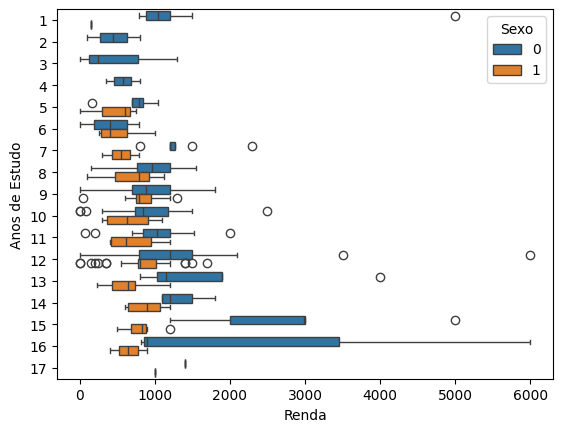

In [46]:
sns.boxplot(x= 'Renda', y= 'Anos de Estudo', data=dados.query('Renda < 10000 and Idade == 20'), hue='Sexo', orient='h')

> ### Conclusões
Fica muito claro a diferença de Renda entre homens e mulheres. Pode-se afirmar que quanto mais anos de instrução maior a diferença de renda, principalmente, quando mais jovens, com 20 anos de idade, como no exemplo acima. Porém, neste caso, mulheres com menos de 5 anos de instrução simplemente não tem renda. Com idade mais avançada, 30 anos por exemplo, essa diferença de renda diminui. Porém, o padrão se mantém, de quanto maior o grau de instrução, maior a diferença de renda.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [49]:
freq_UF=dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
freq_UF.rename(uf, inplace= True)
freq_UF

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: xlabel='Renda', ylabel='UF'>

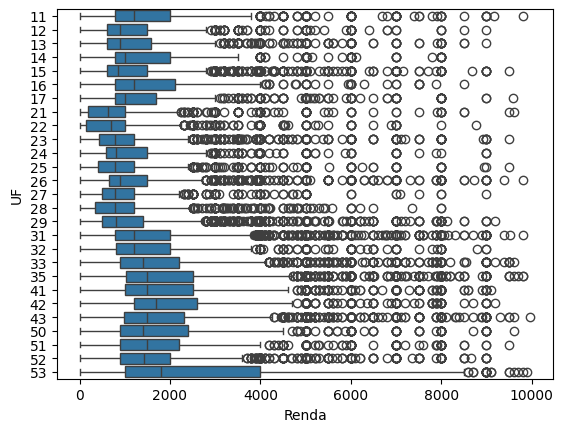

In [50]:
sns.boxplot(x='Renda', y= 'UF', data= dados.query('Renda < 10000'), orient='h')

> ### Conclusões

Escreva suas conclusões aqui...